# Introducción a la visualización de datos: Distribuciones


**Distribuciones de Datos**

Si tomamos el valor mínimo y el valor máximo de nuestro conjunto de datos tenemos el rango dentro del cual están contenidos todos nuestros datos. Pero dentro de ese rango los valores pueden estar distribuidos de muchas maneras distintas. A veces están muy cerca del valor mínimo, a veces están muy cerca del valor máximo; a veces se amontonan casi todos alrededor de la mediana y sólo unos pocos toman los valores extremos; a veces generan incluso dos "montículos" alrededor de los cuales se concentran la mayoría de los datos. Hay muchísimas posibilidades.

Usando valores individuales es imposible tener una idea general de nuestro conjunto y es por eso que solemos utilizar algunas técnicas que toman en cuenta todo el conjunto de datos al mismo tiempo. Hoy vamos a aprender cómo a través de la visualización de datos podemos darnos una idea mucho más precisa de cómo están organizados los datos en nuestro conjunto.

**Boxplots**

Los Boxplots (o diagramas de caja) son una manera de visualizar nuestros datos de forma que la organización de los percentiles se haga muy evidente.

Los Boxplots nos ayudan a discernir si nuestros datos están sesgados (si tienen una tendencia), si están dispersos o agrupados y si existen valores atípicos con valores extremos.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv', index_col=0)
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


<Axes: xlabel='price'>

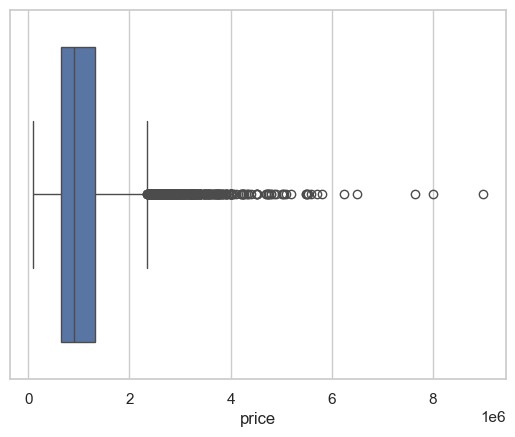

In [3]:
sns.set(style="whitegrid")
sns.boxplot(x=df['price'])

¿Qué significa todo esto?

- La caja está delimitada por 2 valores: El percentil 25 y el percentil 75.
- La línea vertical dentro de la caja indica el percentil 50 (o sea, la mediana).
- Los "bigotes" intentan abarcar el resto de los datos a la izquierda y derecha de la caja, PERO no se extienden más allá de una distancia equivalente a 1.5 * Rango Intercuartílico. Como bien recordarás, el rango intercuartílico es la diferencia entre el percentil 75 y el percentil 25. Si multiplicamos 1.5 por ese Rango Intercuartílico obtenemos el tamaño máximo de los bigotes.
- Los puntos individuales que están fuera de los bigotes son, obviamente, las muestras cuyo valor excede el tamaño máximo de los bigotes. No podemos tomar esto como una "Regla Absoluta", pero en general se considera que estos valores son los valores atípicos de nuestro conjunto.

Como puedes ver, esta gráfica nos da muchísima información muy útil.

- Ahora sabemos que la mayoría de nuestros datos están concentrados en valores menores a 2 000 000 y que los precios muy altos son anomalías en nuestro conjunto.
- Sabemos que, dentro del rango total de los datos, tenemos una distribución que tiende hacia los valores más pequeños.
- También sabemos que nuestros datos en general están muy concentrados (o sea, poco dispersos), pero que hay una "colita" de datos hacia la derecha que se extiende bastante lejos.

Vamos a ver qué pasa si graficamos una línea vertical justo donde está el promedio de nuestros datos. Para esto vamos a usar matplotlib, otra librería de visualizaciones de datos que aprenderemos a detalle más adelante:

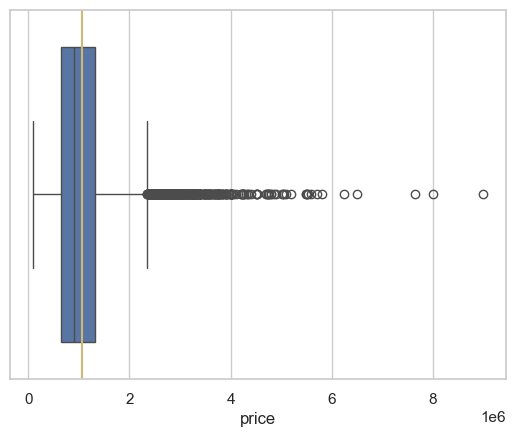

In [5]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df['price'])
plt.axvline(df['price'].mean(), c='y')

Como puedes ver, a pesar de los valores atípicos tan extremos, tenemos tantos valores en el rango menor de nuestros datos que el promedio queda bastante cercano a la mediana.

Los valores atípicos pueden significar múltiples cosas:

- A veces son errores de medición
- A veces son errores humanos de transcripción
- Podrían ser simplemente anomalías naturales causadas por fenómenos aleatorios
- O podrían tener un significado más profundo: por ejemplo, la riqueza de alguien como Carlos Slim es una anomalía en este país, pero que es un indicador de desigualdad muy fuerte que nos da información útil acerca de la distribución de la riqueza

Decidir cómo lidiar con estos valores atípicos (si eliminarlos o dejarlos) depende totalmente del contexto.

Dado que nuestro análisis de este conjunto aún no es muy profundo, por el momento vamos a asumir la posición de eliminar estos datos, solamente para ver cómo se haría este proceso.

### Rango Intercuartílico y valores atípicos

Podemos utilizar la medida que utiliza el boxplot para limitar el tamaño de los bigotes y filtrar todos los datos que excedan ese límite. A esta medida se le suele llamar el **Score de Rango Intercuartílico (IQR-Score)**. De esa manera estamos filtrando los valores atípicos (al menos lo que se considera valores atípicos bajo este esquema).

In [6]:
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
filtro_inferior = df['price'] > df['price'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['price'] < df['price'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df[filtro_inferior & filtro_superior]

<Axes: ylabel='price'>

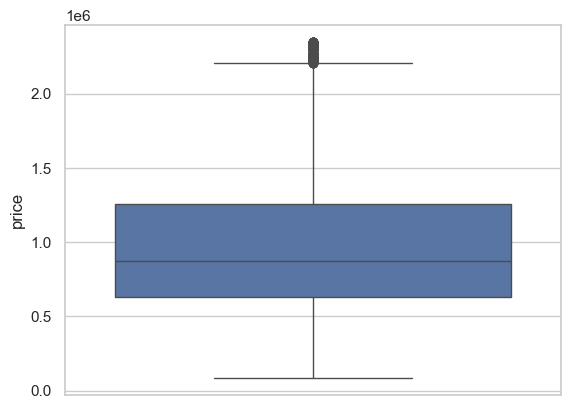

In [7]:
sns.boxplot(df_filtrado['price'])

**Tabla de frecuencias**

Los percentiles segmentan nuestros datos en segmentos de distinto tamaño en los que tenemos el mismo número de muestras. En cambio, las tablas de frecuencias segmentan nuestros datos en segmentos que miden lo mismo pero que contienen una cantidad distinta de muestras.

Esto puede darnos otra perspectiva de nuestros datos que también resulta muy útil. Vamos a aprender a generar una tabla de frecuencias usando pandas.

In [8]:
prices = df['price']
prices.max() - prices.min()

np.float64(8915000.0)

Tomando en cuenta nuestro rango, vamos a decidir dividir nuestro conjunto en 20 segmentos. Usemos ahora nuestro método `cut` para segmentar nuestros datos.

In [9]:
pd.cut(prices, 20)

0        (1422250.0, 1868000.0]
1         (976500.0, 1422250.0]
2        (1422250.0, 1868000.0]
3          (530750.0, 976500.0]
4        (1422250.0, 1868000.0]
                  ...          
11641      (530750.0, 976500.0]
11642     (976500.0, 1422250.0]
11643      (530750.0, 976500.0]
11644    (2313750.0, 2759500.0]
11645      (530750.0, 976500.0]
Name: price, Length: 11646, dtype: category
Categories (20, interval[float64, right]): [(76085.0, 530750.0] < (530750.0, 976500.0] < (976500.0, 1422250.0] < (1422250.0, 1868000.0] ... (7217000.0, 7662750.0] < (7662750.0, 8108500.0] < (8108500.0, 8554250.0] < (8554250.0, 9000000.0]]

Ok... ¿Qué acaba de suceder? `pd.cut` toma el rango completo de nuestros datos, y luego crea 20 segmentos de igual tamaño. Después, revisa uno por uno nuestros datos, los ubica en uno de los segmentos y nos regresa una `Serie` donde tenemos cada índice clasificado en el segmento que lo toca.

Ahora, para dividir nuestro dataset por segmentos, podemos utilizar `pd.groupby` y pasarle la `Serie` que obtuvimos. Lo que hace `groupby` en este caso es leer la clasificación de cada índice y agruparlos de manera que todas las muestras que pertencen a la misma clasificación queden juntas.

Después de agruparlos, podemos usar un `count` para saber cuántas muestras hay en cada grupo:

In [10]:
segmentos = pd.cut(prices, 20)

df['price'].groupby(segmentos).count()

/var/folders/6y/h3dg3qkd6b9fh7skk0n78c2r0000gn/T/ipykernel_44478/3408492839.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['price'].groupby(segmentos).count()


price
(76085.0, 530750.0]       1747
(530750.0, 976500.0]      4835
(976500.0, 1422250.0]     2664
(1422250.0, 1868000.0]    1278
(1868000.0, 2313750.0]     570
(2313750.0, 2759500.0]     261
(2759500.0, 3205250.0]     141
(3205250.0, 3651000.0]      67
(3651000.0, 4096750.0]      40
(4096750.0, 4542500.0]      16
(4542500.0, 4988250.0]      10
(4988250.0, 5434000.0]       5
(5434000.0, 5879750.0]       7
(5879750.0, 6325500.0]       1
(6325500.0, 6771250.0]       1
(6771250.0, 7217000.0]       0
(7217000.0, 7662750.0]       1
(7662750.0, 8108500.0]       1
(8108500.0, 8554250.0]       0
(8554250.0, 9000000.0]       1
Name: price, dtype: int64

¡Y Listo! Tenemos una tabla donde los índices son los 20 rangos en los que se dividió nuestro dataset y los valores de la tabla son los conteos de cada agrupación. De esta manera quedan aún en más evidencia los valores atípicos, ya que podemos ver varios segmentos donde la cantidad de muestras es muy baja.

Ésta podría ser aún otra manera de eliminar valores atípicos, ya que podríamos, por ejemplo, decidir eliminar todos los datos que se encuentran en segmentos con menos de 50 muestras.

**Histogramas**

Los histogramas son una manera de visualizar nuestras tablas de frecuencias.

El eje x es el rango de nuestros datos y se divide por segmentos (como los que generamos en el Ejemplo pasado).

El eje y indica el conteo de muestras en cada segmento.

<Axes: xlabel='price', ylabel='Count'>

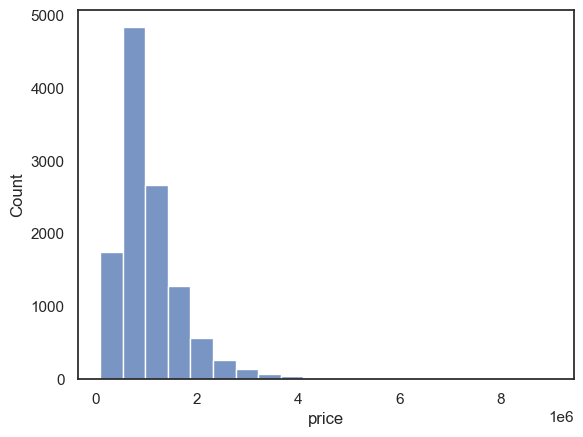

In [51]:
sns.set_theme(style='white')
sns.histplot(df['price'], kde=False, stat="count", bins=20)

- La bandera `kde=False` evita que se grafique también la densidad de probabilidad (que veremos más adelante).
- `bins=20` indica el número de segmentos.

Esta gráfica indica con mucha claridad hacia donde "tienden" nuestros datos, ¿no es así?

Podemos ver mucha más granularidad incluso si aumentamos el tamaño de nuestros `bins`:

<Axes: xlabel='price', ylabel='Count'>

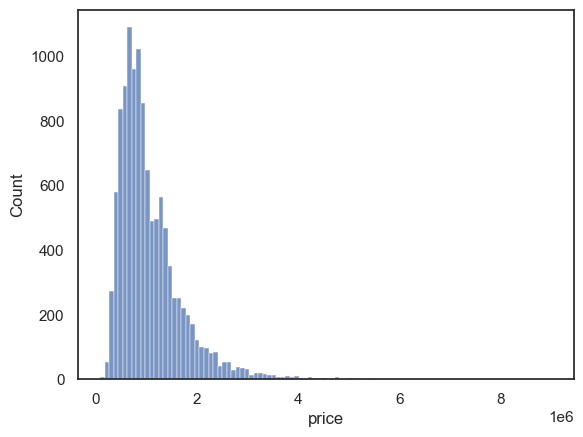

In [52]:
sns.set_theme(style='white')
sns.histplot(df['price'], kde=False, stat="count", bins=100)

Vamos a ver algunas formas comunes que pueden tener nuestros histogramas. Normalmente las gráficas que obtengamos con datos provenientes del mundo real no encajan a la perfección con estas formas, pero ayuda tener referencias para poder describir nuestras gráficas.

Solemos describir nuestros datos utilizando dos parámetros: asimetría y curtosis.

**Asimetría (skewness)**

La asimetría nos da una medida de la falta de simetría en una distribución (duh). Una distribución es simétrica si se ve igual a la izquierda y derecha del punto central.

- Una asimetría de 0 indica que la simetría de la distribución es perfecta.

- Números positivos indican que hay una asimetría positiva, es decir que la cola de la derecha es más larga que la cola de la izquierda.

- Números negativos indican que hay una asimetría negativa, es decir que la cola de la izquierda es más larga que la cola de la derecha.

**Curtosis (kurtosis)**

La curtosis es una medida de la dispersión de nuestros datos. La curtosis nos dice qué tan escarpada o achatada está nuestra distribución.

- Curtosis de 0 indica que la dispersión de nuestros datos es normal (más adelante aprenderemos exactamente qué significa esto).

- Curtosis negativa indica que nuestra distribución está achatada. Esto implica que hay más dispersión de nuestros datos (más outliers), que están más lejanos de nuestro punto central y que por lo tanto tenemos colas más delgadas (comparadas con la cola normal).

- Curtosis positiva indica que nuestra distribución está escarpada. Esto implica que hay menos dispersión de nuestros datos, que están más cercanos a nuestro punto central y que por lo tanto tenemos colas más gruesas (comparadas con la cola normal).

![curtosis](./imgs/image-10.png.webp)

No todas las técnicas para medida curtosis establecen la normalidad en 0, pero nosotros vamos a utilizar la default en `scipy` y `pandas`.

---

Para calcular las medidas de curtosis y asimetría usaremos los métodos `kurtosis` y `skew` de la librería `scipy.stats`.

Usando estas definiciones estamos listos para visualizar algunas distribuciones con características distintas:

**Distribución Normal (Standard Normal)**

La distribución normal es una de las más famosas y más utilizadas. Muchos de los análisis estadísticos que hacemos toman a la distribución normal como un "estándar". Hay algunas medidas que incluso requieren que la distribución sea normal para funcionar. A través de este módulo nos toparemos varias veces con esta distribución y la exploraremos más a profundidad. Por el momento basta saber que la distribución normal tiene una asimetría de 0 y una curtosis de 0 (usando el método default de `scipy` y `pandas`.

Otra cosa interesante es que la distribución normal estándar tiene un promedio de 0, una mediana de 0, una moda de 0 y una desviación estándar de 1. Esto implica que el 68% de los datos están a 1 desviación estándar de la media y el 95% de los datos están a 2 desviaciones estándares de la media.

Esta distribución se ve así:

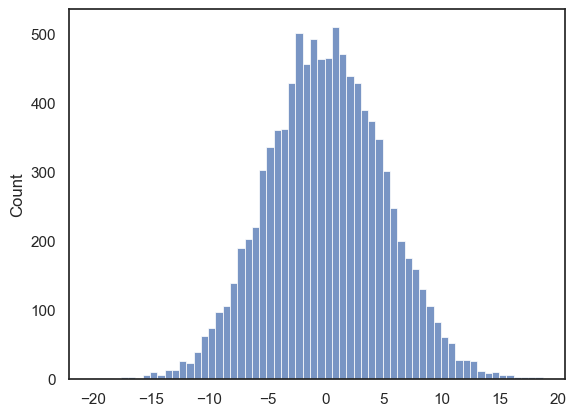

In [56]:
normal = np.random.normal(loc=0, scale=5, size=10000)
sns.histplot(normal, kde=False, stat="count");

In [57]:
print(f'Curtosis: {kurtosis(normal)}')
print(f'Asimetría: {skew(normal)}')

Curtosis: 0.019630737367064555
Asimetría: 0.031982788055938585


**Distribuciones de cola corta (short-tailed)**

Las distribuciones de cola corta se concentran mucho en el punto central y casi no se extienden hacia los lados. Es raro en realidad encontrar distribuciones de cola corta, pero así se vería una:

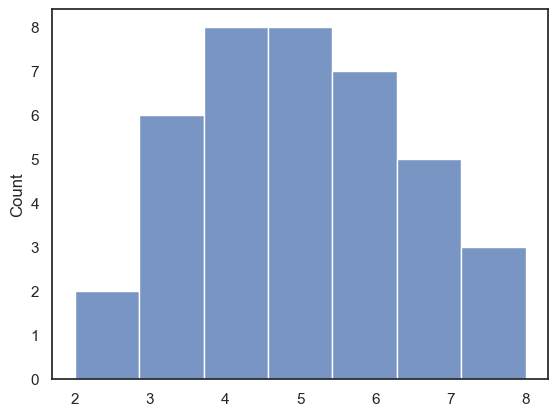

In [49]:
cola_corta = np.array([2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8])

sns.histplot(cola_corta, kde=False, bins=7, stat="count");

In [32]:
print(f'Curtosis: {kurtosis(cola_corta)}')
print(f'Asimetría: {skew(cola_corta)}')

Curtosis: -0.8509615384615383
Asimetría: 0.10598753694734905


**Distribuciones de cola larga (fat-tailed)**

Estas distribuciones se extienden mucho hacia los lados (o hacia uno de los dos lados) a partir del punto central. Muchos fenómenos naturales y sociales tienen distribuciones de cola larga.

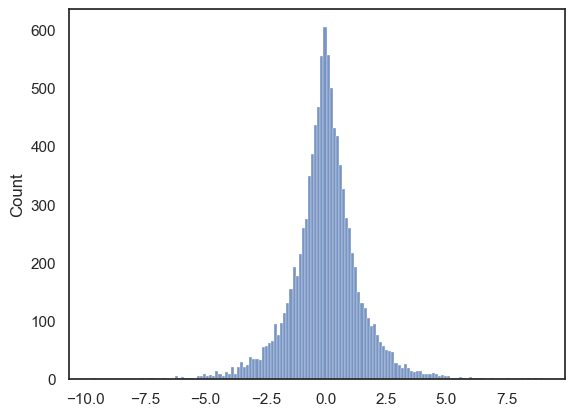

In [48]:
cola_larga = np.random.laplace(loc=0.0, scale=1, size=10000)

sns.histplot(cola_larga, kde=False, stat="count");

In [34]:
print(f'Curtosis: {kurtosis(cola_larga)}')
print(f'Asimetría: {skew(cola_larga)}')

Curtosis: 3.086505669176213
Asimetría: -0.016730553346593877


**Asimetría Positiva (right-skewed)**

Las distribuciones con asimetría positiva tienen colas más largas hacia el lado derecho del punto central.

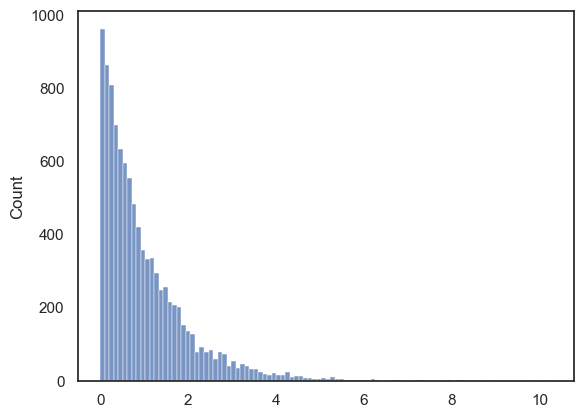

In [47]:
asimetria_positiva = np.random.exponential(scale=1.0, size=10000)

sns.histplot(asimetria_positiva, kde=False, stat="count");

In [37]:
print(f'Curtosis: {kurtosis(asimetria_positiva)}')
print(f'Asimetría: {skew(asimetria_positiva)}')

Curtosis: 5.1684975812068235
Asimetría: 1.9369035202959577


**Asimetría negativa (left-skewed)**

Las distribuciones con asimetría negativa tienen colas más largas hacia el lado izquierdo del punto central.

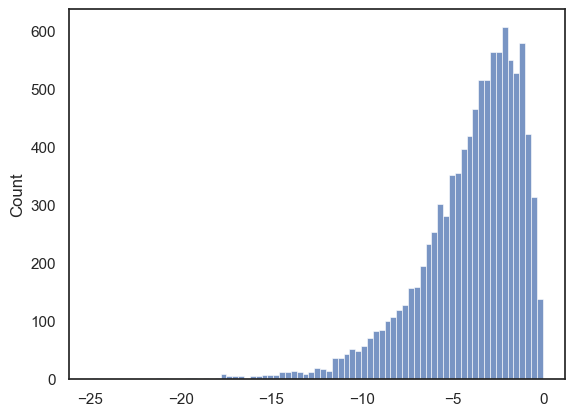

In [46]:
asimetria_negativa = np.random.chisquare(4, size=10000) * -1

sns.histplot(asimetria_negativa, kde=False, stat="count");

In [39]:
print(f'Curtosis: {kurtosis(asimetria_negativa)}')
print(f'Asimetría: {skew(asimetria_negativa)}')

Curtosis: 3.0978497347950613
Asimetría: -1.433013226754498


Hay algunas distribuciones que tienen valores muy extremos tanto de curtosis como de asimetría:

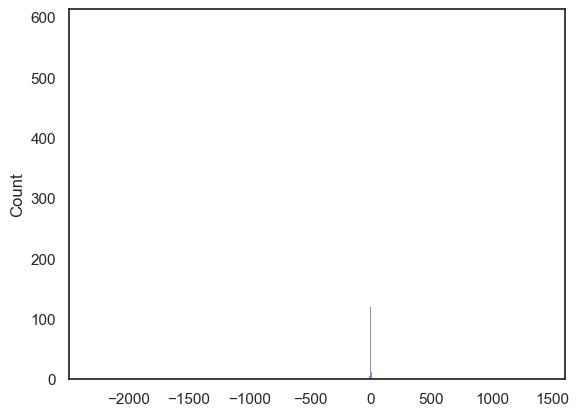

In [60]:
cauchy = np.random.standard_cauchy(size=10000)

sns.histplot(cauchy, kde=False);

In [61]:
print(f'Curtosis: {kurtosis(cauchy)}')
print(f'Asimetría: {skew(cauchy)}')

Curtosis: 1695.0113258295366
Asimetría: -26.08051969199741


**Distribución uniforme (uniform distribution)**

Una distribución uniforme se genera cuando todos los valores tienen la misma probabilidad (o casi) de suceder. Esto genera una gráfica bastante plana en la parte superior que además tiene una curtosis negativa (porque tiene "colas" muy gruesas):

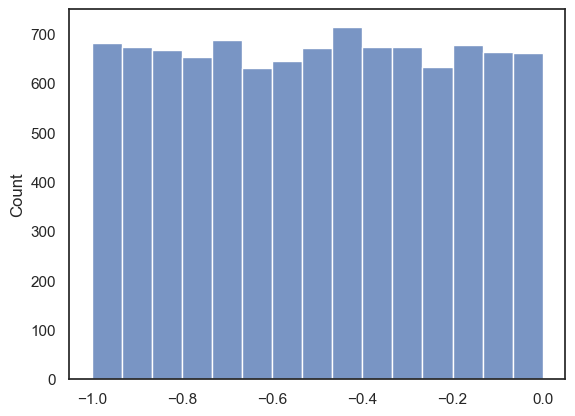

In [62]:
uniform = np.random.uniform(low=-1, high=0, size=10000)
sns.histplot(uniform, bins=15, kde=False);

In [63]:
print(f'Curtosis: {kurtosis(uniform)}')
print(f'Asimetría: {skew(uniform)}')

Curtosis: -1.1941991222791961
Asimetría: -0.0032614868984731224


**Distribución bimodal y multimodal**

Hay veces que no tenemos un solo pico en nuestros datos. Puede suceder que haya dos o más concentraciones de valores en nuestros datos. A esto le llamamos distribuciones bimodales (cuando hay 2 concentraciones) y multimodales (cuando hay más de 2).

Debemos de ser muy cuidadosos al usar las medidas de curtosis y asimetría con este tipo de distribuciones, ya que pueden darnos ideas erróneas de lo que realmente está sucediendo.

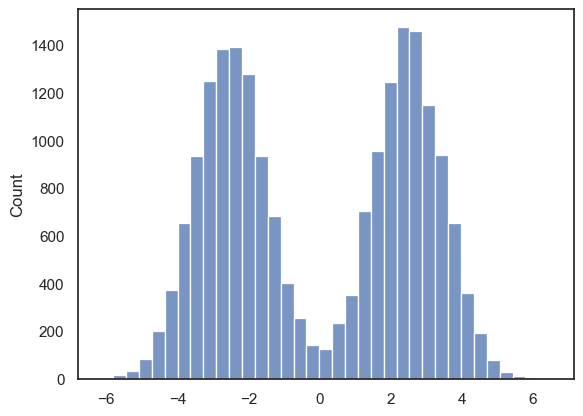

In [65]:
normal_left = np.random.normal(loc=-2.5, scale=1, size=10000)
normal_right = np.random.normal(loc=2.5, scale=1, size=10000)
bimodal = np.concatenate([normal_left, normal_right])

sns.histplot(bimodal, kde=False);

In [66]:
print(f'Curtosis: {kurtosis(bimodal)}')
print(f'Asimetría: {skew(bimodal)}')

Curtosis: -1.4945028648514318
Asimetría: -0.0033965226936905446


**Gráficas de densidad**

Las gráficas de densidad son una manera de obtener la densidad de probabilidad de un conjunto de datos. Saber cómo obtener una densidad de probabilidad y cómo se genera una gráfica de densidad está fuera del alcance de este curso. Pero lo que nos interesa a nosotros es que utilizando gráficas de densidad se vuelven mucho más evidentes las distribuciones de nuestros datos.

De igual manera, las gráficas de densidad son una gran herramienta para comparar distribuciones en una misma gráfica.

In [67]:
import numpy as np
import seaborn as sns

sns.set_theme(style='whitegrid')

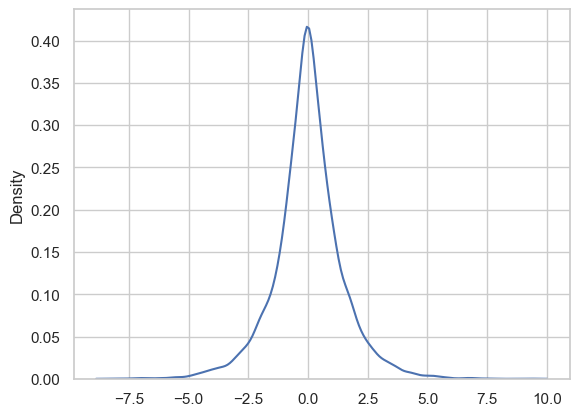

In [69]:
laplace = np.random.laplace(loc=0.0, scale=1, size=10000)
sns.kdeplot(laplace);

<Axes: ylabel='Density'>

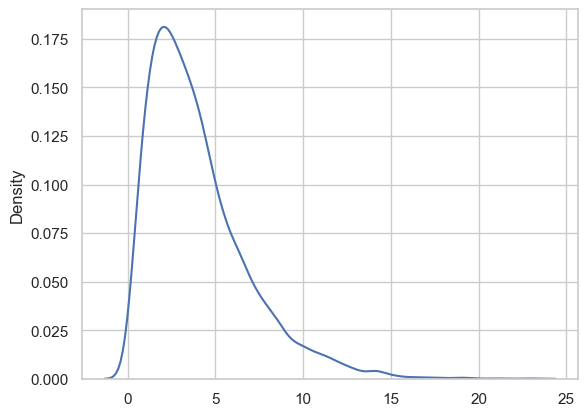

In [70]:
chisquare = np.random.chisquare(4, size=10000)
sns.kdeplot(chisquare)

Las gráficas de densidad son muy útiles para graficar varias distribuciones en la misma gráfica y poderlas comparar:

<Axes: ylabel='Density'>

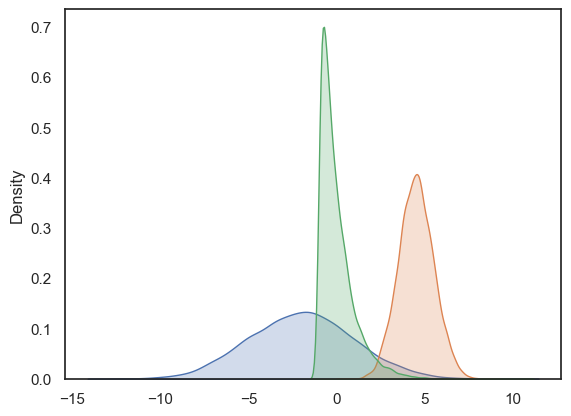

In [94]:
sns.set_theme(style='white')

normal_1 = np.random.normal(loc=-2, scale=3, size=10000)
normal_2 = np.random.normal(loc=4.5, scale=1, size=10000)
exponential = np.random.exponential(scale=1.0, size=10000) - 1

sns.kdeplot(normal_1, fill=True)
sns.kdeplot(normal_2, fill=True)
sns.kdeplot(exponential, fill=True)

**Variables Categóricas**

Hasta ahora hemos aprendimos a explorar la distribución de variables numéricas. ¿Qué hay de las categóricas? Hay muchas técnicas más que han sido desarrolladas para analizar variables categóricas, como las gráficas de barras y las tablas de contigencia. En esta sesión aprenderemos a utilizar estas técnicas.

También aprenderemos a darle un poco más de claridad a nuestras gráficas añadiendo títulos y leyendas. Además, aprenderemos a producir más de una gráfica al mismo tiempo para poder comparar entre múltiples categorías.

**Anotando nuestras gráficas**

En la sesión anterior aprendimos a realizar gráficas de distribuciones de datos, pero no vimos cómo añadir anotaciones para darle más claridad a nuestras visualizaciones.

Un científico de datos es un comunicador, y como tal es muy importante que podamos generar gráficas comprensibles y fáciles de interpretar para que la información que encontremos pueda ser transmitida.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')

In [73]:
df = pd.read_csv('../../datasets/athlete_olympic_events-clean.csv', index_col=0)
df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


Añadir títulos y nombres para nuestros ejes es tan fácil como llamar el método `set`. Anteriormente habíamos estado llamando nuestros métodos de Seaborn sin asignar los resultados a ninguna variable. Si asignamos nuestro resultado a la variable `ax`, podemos ahora llamar el método `set` de esa variable para anotar nuestra gráfica:

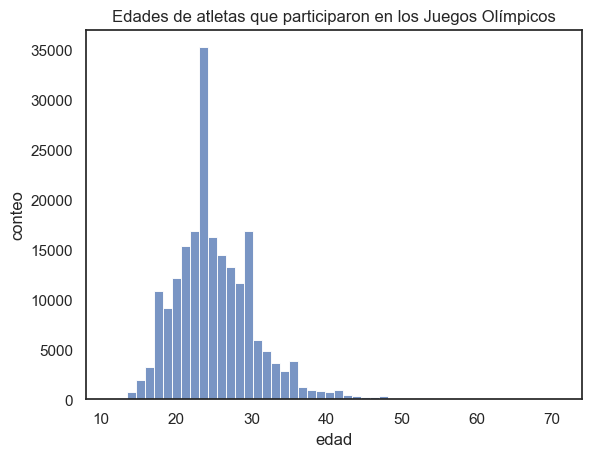

In [86]:
ax = sns.histplot(df['age'], bins=50)
ax.set(title='Edades de atletas que participaron en los Juegos Olímpicos', xlabel='edad', ylabel='conteo');

Observa que he colocado un punto y coma al final de la última línea. Esto se hace para que Jupyter Notebooks no me muestre el output de la última línea, ya que esto ensuciaría un poco mi visualización.

En el caso de que tengamos dos o más gráficas (o categorías) al mismo tiempo, podemos añadir una leyenda a nuestra gráfica para poder diferenciar nuestros datos:

In [87]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)
males = by_athlete[merged['sex'] == 'M']
females = by_athlete[merged['sex'] == 'F']

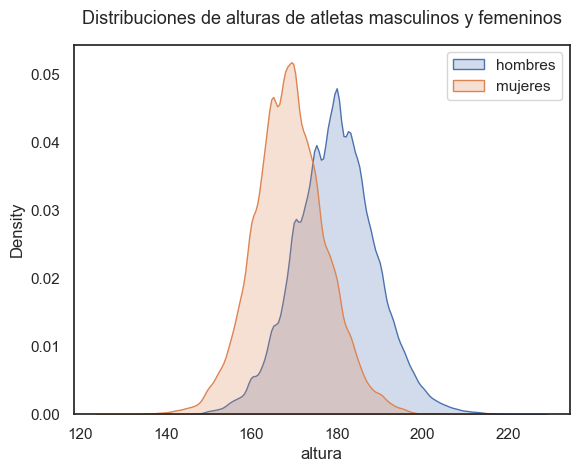

In [93]:
ax = sns.kdeplot(males['height'], fill=True, label='hombres')
sns.kdeplot(females['height'], fill=True, ax=ax, label='mujeres')
ax.set_title('Distribuciones de alturas de atletas masculinos y femeninos', fontsize=13, pad=15);
ax.set(xlabel='altura');
ax.legend(loc='upper right');

En la gráfica anterior usamos el método `set_title` en vez del genérico `set` para poder agregar el tamaño de la letra (`fontsize`) y el tamaño de la separación entre el título y la gráfica (`pad`).

---

También podemos cambiar el tamaño de nuestras gráficas. Para eso tendremos que echar mano de la librería sobre la cual está construida `seaborn`: `matplotlib`. `matplotlib` es la librería de visualizaciones en Python más conocida y utilizada. Algunas de las nuevas librerías que son muy famosas, como `seaborn` están construidas sobre `matplotlib`. Esto quiere decir que para poder acceder a todo el poder de las visualizaciones en Python es importante saber cómo funcionan ambas.

Por ahora sólo vamos a ver lo siguiente:

Cada vez que creas una nueva gráfica con `seaborn`, esta gráfica está contenida dentro de algo que llamamos `figures` en `matplotlib`. Una `figure` puede contener múltiples gráficas. Cada que generas una gráfica con `seaborn`, una nueva `figure` se genera automáticamente. Podemos generar manualmente la `figure` para después utilizarla para personalizar nuestra gráfica. Para determinar el tamaño de nuestra gráfica podemos hacer lo siguiente:

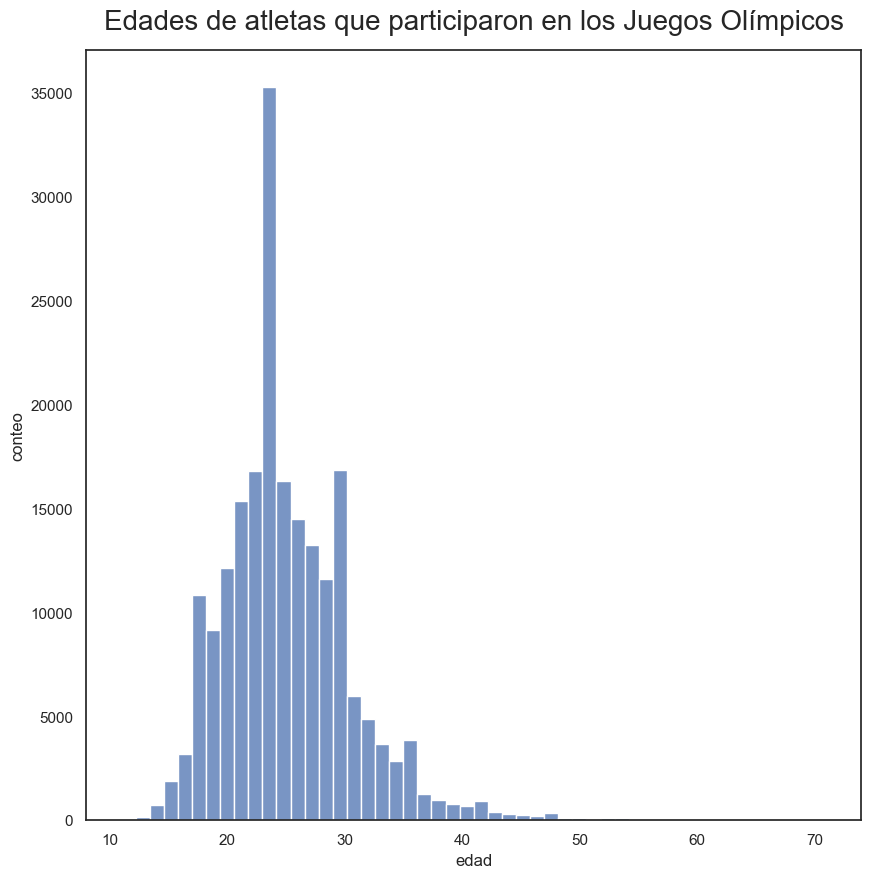

In [95]:
fig = plt.figure(figsize=(10, 10))
ax = sns.histplot(df['age'], bins=50)
ax.set_title('Edades de atletas que participaron en los Juegos Olímpicos', fontsize=20, pad=15)
ax.set(xlabel='edad', ylabel='conteo');

**Gráficas de barras y la Moda**

Así como los histogramas nos sirven para visualizar las distribuciones de variables numéricas, las gráficas de barras son una herramienta muy común para visualizar los conteos de frecuencias de variables categóricas.

En una gráfica de barras, el eje y puede indicar tanto conteo de frecuencias como el porcentaje de la frecuencia. Veamos cómo realizar ambas.

In [96]:
import pandas as pd
import seaborn as sns
sns.set_style('white')

In [97]:
df = pd.read_json('../../datasets/zomato_reviews-clean.json')
df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating.rating_text
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


En este dataset tenemos una variable llamada 'user_rating' que es categórica. Para saber si es categórica podemos primero revisar con el método `unique` para ver todos los valores únicos contenidos en esa columna:

In [100]:
df['user_rating.rating_text'].unique()

array(['Very Good', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

In [102]:
df['user_rating.rating_text'].nunique()

6

`nunique` nos da el número de categorías que tenemos.

Ahora, para poder graficar nuestra variable como gráfica de barras necesitamos los conteos de frecuencias de cada categoría (es decir, cuántas veces aparece cada categoría. Para eso `pandas` nos ofrece un método llamado `value_counts`:

In [103]:
df['user_rating.rating_text'].value_counts()

user_rating.rating_text
Very Good    490
Good         346
Excellent    194
Average      119
Not rated     26
Poor           5
Name: count, dtype: int64

El método nos regresa una `Serie` con los nombres de la categorías como índices y los conteos como valores. Esta tabla la podemos usar para generar nuestra gráfica:

In [114]:
counts = df['user_rating.rating_text'].value_counts()
counts

user_rating.rating_text
Very Good    490
Good         346
Excellent    194
Average      119
Not rated     26
Poor           5
Name: count, dtype: int64

/var/folders/6y/h3dg3qkd6b9fh7skk0n78c2r0000gn/T/ipykernel_44478/930706548.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(counts, palette='viridis')


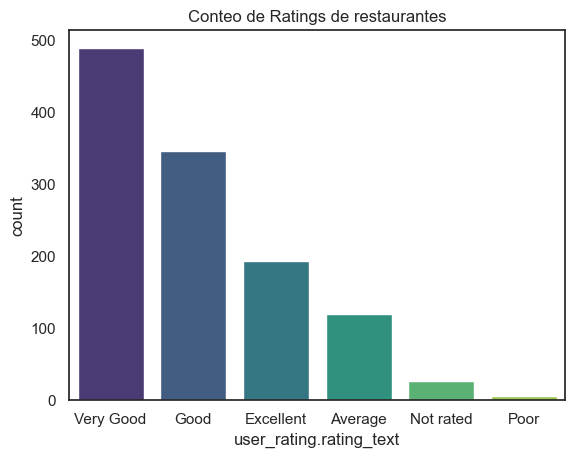

In [117]:
ax = sns.barplot(counts, palette='viridis') 
ax.set_title('Conteo de Ratings de restaurantes')
ax.set(ylabel='count');

Ahora, si queremos que el eje y sean porcentajes en vez de conteos, podemos simplemente transformar nuestra `Serie` `counts` con una simple regla de 3:

In [118]:
counts * 100 / counts.sum()

user_rating.rating_text
Very Good    41.525424
Good         29.322034
Excellent    16.440678
Average      10.084746
Not rated     2.203390
Poor          0.423729
Name: count, dtype: float64

In [119]:
as_percentages = counts * 100 / counts.sum()

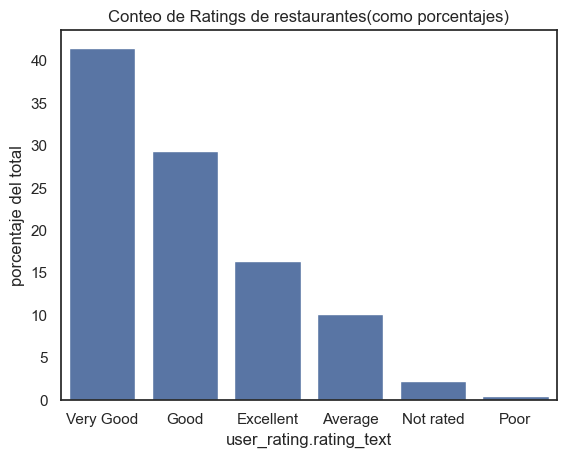

In [125]:
ax = sns.barplot(as_percentages)
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total');

Si quieres acomodar los nombres de tus tics en el eje x, puedes utilizar el siguiente código para cambiarles la rotación:

/var/folders/6y/h3dg3qkd6b9fh7skk0n78c2r0000gn/T/ipykernel_44478/466837704.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=50);


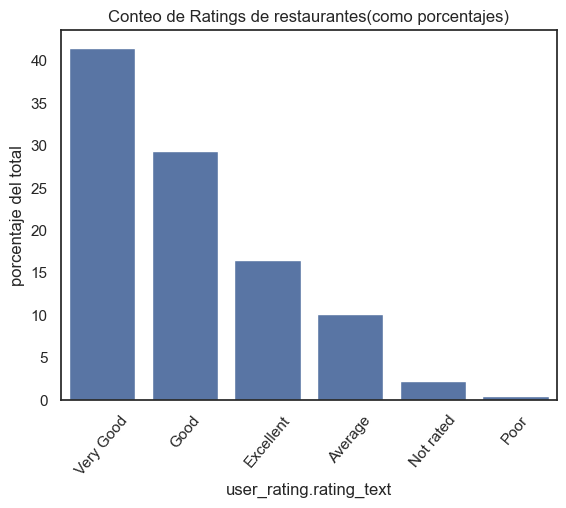

In [126]:
ax = sns.barplot( as_percentages)
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

En este caso no había mucha necesidad de rotar los nombres, pero hay veces que rotar los nombres y/o cambiar el tamaño de la gráfica es la única manera de hacerlos comprensibles.

---

Hay veces que resulta más cómodo y comprensible acomodar nuestras barras de manera horizontal. Esto puede hacerse muy fácilmente agregando la bandera `orient='h'` y cambiando el orden de nuestros inputs:

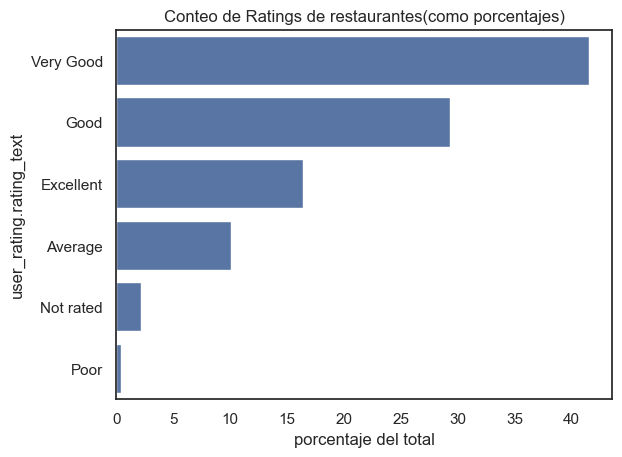

In [127]:
ax = sns.barplot(as_percentages, orient='h')
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(xlabel='porcentaje del total');

La moda es el "valor típico" de nuestra variable categórica. Representa la categoría que más veces aparece en nuestro conjunto de datos.

Podemos extraer la moda de la tabla de `value_counts` o de la gráfica de barras, pero `pandas` también ofrece un método para obtenerla fácilmente:

In [129]:
df['user_rating.rating_text'].mode()

0    Very Good
Name: user_rating.rating_text, dtype: object

**Tablas de contigencia e indexación en múltiples niveles**

Es común que tengamos más de una variable categórica en nuestros conjuntos. Si queremos realizar un conteo de frecuencias usando dos o más variables categóricas para agrupar a nuestros datos podemos usar lo que se llama "tablas de contigencia".

`pandas` ofrece un método llamado `crosstab` que nos permite realizar estas tablas en un santiamén.

¡También aprovecharemos los resultados de nuestro método `crosstab` para aprender a indexar `DataFrames` con múltiples niveles de columnas!

Podemos usar el método `crosstab` para generar tablas de contingencia usando dos de nuestras variables categóricas:

In [132]:
pd.crosstab(df['price_range'], df['user_rating.rating_text'])

user_rating.rating_text,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


Podemos obtener una columna y una fila con los totales añadiendo la bandera `margins` y `margins_name`:

In [133]:
pd.crosstab(df['price_range'], df['user_rating.rating_text'], margins=True, margins_name='total')

user_rating.rating_text,Average,Excellent,Good,Not rated,Poor,Very Good,total
price_range,,,,,,,
1,12,9,33,1,0,19,74
2,47,37,116,3,2,132,337
3,41,84,141,3,1,218,488
4,19,64,56,19,2,121,281
total,119,194,346,26,5,490,1180


Como puedes observar, el índice está indicando la primera agrupación de nuestros datos (la columna 'price_range'), mientras que las columnas indican la segunda agrupación (la columna 'user_rating').

---

También podemos añadir una variable categórica más para generar múltiples niveles en las columnas:

In [137]:
pd.crosstab(df['price_range'], [df['has_online_delivery'], df['user_rating.rating_text']], margins=True, margins_name='total')

has_online_delivery           0                                          \
user_rating.rating_text Average Excellent Good Not rated Poor Very Good   
price_range                                                               
1                            12         8   32         1    0        15   
2                            47        30  104         3    1        99   
3                            40        70  132         3    1       183   
4                            19        61   52        19    2       113   
total                       118       169  320        26    4       410   

has_online_delivery           1                               total  
user_rating.rating_text Average Excellent Good Poor Very Good        
price_range                                                          
1                             0         1    1    0         4    74  
2                             0         7   12    1        33   337  
3                             1        14    9    0        35   488  
4                             0         3    4    0         8   281  
total                         1        25   26    1        80  1180

### Múltiples niveles en columnas

Es un buen momento para aprender a indexar múltiples niveles en columnas. Recordarás que los multiíndices en filas se indexan de la siguiente forma:

df.loc[(primer_indice, segundo_indice)]

Cuando tenemos múltiples niveles en las columnas, simplemente pasamos como primer valor nuestra indexación por filas, y después una tupla con la indexación por columnas:

In [140]:
crosstab = pd.crosstab(df['price_range'], [df['has_online_delivery'], df['user_rating.rating_text']])
crosstab

has_online_delivery           0                                          \
user_rating.rating_text Average Excellent Good Not rated Poor Very Good   
price_range                                                               
1                            12         8   32         1    0        15   
2                            47        30  104         3    1        99   
3                            40        70  132         3    1       183   
4                            19        61   52        19    2       113   

has_online_delivery           1                                
user_rating.rating_text Average Excellent Good Poor Very Good  
price_range                                                    
1                             0         1    1    0         4  
2                             0         7   12    1        33  
3                             1        14    9    0        35  
4                             0         3    4    0         8

In [142]:
crosstab.loc[:, (0)]

user_rating.rating_text,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,8,32,1,0,15
2,47,30,104,3,1,99
3,40,70,132,3,1,183
4,19,61,52,19,2,113


In [143]:
crosstab.loc[:, (1, 'Poor')]

price_range
1    0
2    1
3    0
4    0
Name: (1, Poor), dtype: int64

Aquí hemos obtenido la columna 'Poor' del grupo `has_online_delivery == 1`.

---

También otra cosa que podríamos hacer es usar el método `stack`. `stack` lo que hace es tomar una de nuestras columnas y convertirla en índice. Si le pedimos que haga el `stack` en el nivel 0, convertirá el nivel 'has_online_delivery' en índice:

In [144]:
crosstab.stack(level=0)

/var/folders/6y/h3dg3qkd6b9fh7skk0n78c2r0000gn/T/ipykernel_44478/4009204203.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  crosstab.stack(level=0)


user_rating.rating_text          Average  Excellent  Good  Not rated  Poor  \
price_range has_online_delivery                                              
1           0                         12          8    32        1.0     0   
            1                          0          1     1        NaN     0   
2           0                         47         30   104        3.0     1   
            1                          0          7    12        NaN     1   
3           0                         40         70   132        3.0     1   
            1                          1         14     9        NaN     0   
4           0                         19         61    52       19.0     2   
            1                          0          3     4        NaN     0   

user_rating.rating_text          Very Good  
price_range has_online_delivery             
1           0                           15  
            1                            4  
2           0                           99  
            1                           33  
3           0                          183  
            1                           35  
4           0                          113  
            1                            8

In [145]:
stack_level_0 = crosstab.stack(level=0)

stack_level_0.loc[(2)]

/var/folders/6y/h3dg3qkd6b9fh7skk0n78c2r0000gn/T/ipykernel_44478/3637630883.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stack_level_0 = crosstab.stack(level=0)


user_rating.rating_text,Average,Excellent,Good,Not rated,Poor,Very Good
has_online_delivery,,,,,,
0,47,30,104,3.0,1,99
1,0,7,12,NaN,1,33


In [146]:
stack_level_0.loc[(2, 1)]

user_rating.rating_text
Average       0.0
Excellent     7.0
Good         12.0
Not rated     NaN
Poor          1.0
Very Good    33.0
Name: (2, 1), dtype: float64

Si hacemos el stack por el nivel 1, obtenemos lo siguiente:

In [148]:
crosstab.stack(level=1)

/var/folders/6y/h3dg3qkd6b9fh7skk0n78c2r0000gn/T/ipykernel_44478/1476482240.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  crosstab.stack(level=1)


has_online_delivery                    0     1
price_range user_rating.rating_text           
1           Average                   12   0.0
            Excellent                  8   1.0
            Good                      32   1.0
            Not rated                  1   NaN
            Poor                       0   0.0
            Very Good                 15   4.0
2           Average                   47   0.0
            Excellent                 30   7.0
            Good                     104  12.0
            Not rated                  3   NaN
            Poor                       1   1.0
            Very Good                 99  33.0
3           Average                   40   1.0
            Excellent                 70  14.0
            Good                     132   9.0
            Not rated                  3   NaN
            Poor                       1   0.0
            Very Good                183  35.0
4           Average                   19   0.0
            Excellent                 61   3.0
            Good                      52   4.0
            Not rated                 19   NaN
            Poor                       2   0.0
            Very Good                113   8.0

**Graficando en múltiples axis**

Cuando tenemos tablas de contigencia, la única manera de poder visualizarlas en una gráfica es generando varias gráficas al mismo tiempo. Afortunadamente `matplotlib` hace de este proceso algo muy sencillo.

In [150]:
crosstab = pd.crosstab(df['price_range'], df['user_rating.rating_text'])
crosstab

user_rating.rating_text,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


¿Recuerdas el objeto `figure`? Bueno, si `figure` es el objeto que contiene nuestras gráficas, los objetos `axes` son los encargados de dibujar cada una de las gráficas. `figure` contiene `axes` y nuestras gráficas se dibujan sobre los `axes`.

Usando el método `subplots`, podemos generar al mismo tiempo una nueva figura y múltiples `axes` que están contenidos en esa figura:

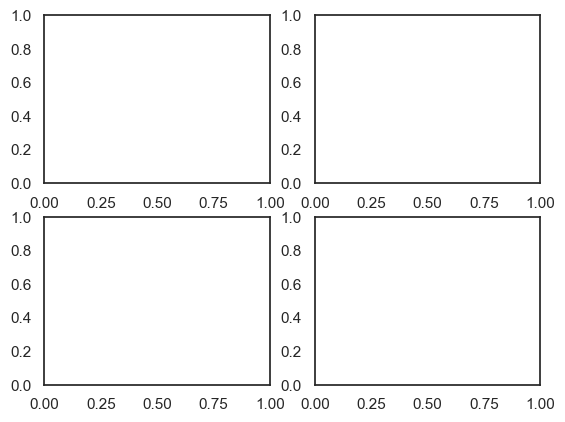

In [151]:
ig, axes = plt.subplots(2, 2)

Le pasamos a `subplots` la estructura de nuestra 'tabla' de gráficas. En este caso, le indicamos un entramado de 2 x 2 porque tenemos 4 valores en el primer nivel.

Grafiquemos:

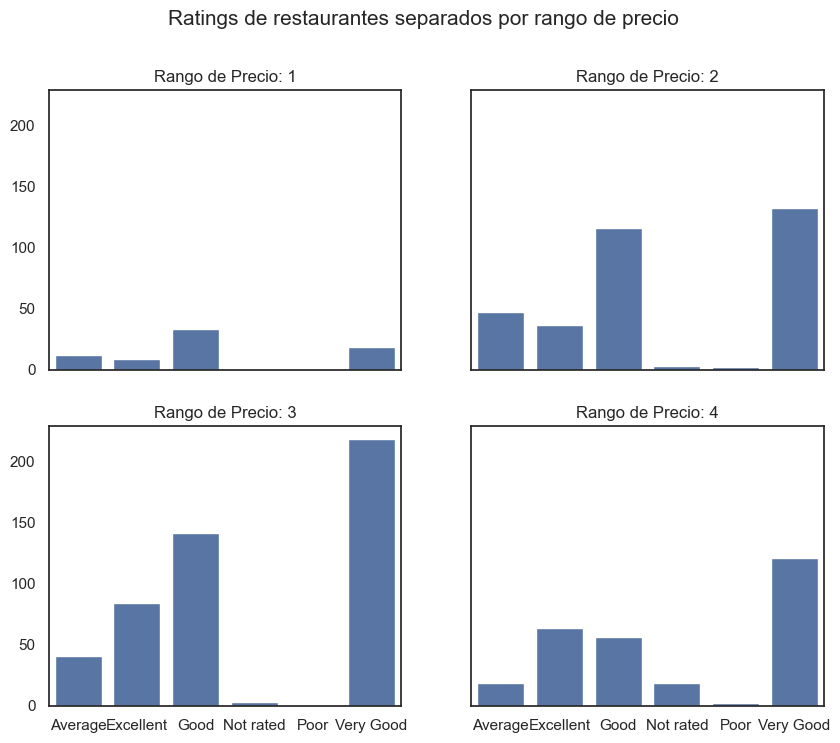

In [154]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(crosstab.loc[1], ax=axes[0, 0])
sns.barplot(crosstab.loc[2], ax=axes[0, 1])
sns.barplot(crosstab.loc[3], ax=axes[1, 0])
sns.barplot(crosstab.loc[4], ax=axes[1, 1])

axes[0, 0].set(xlabel='', ylabel='', title='Rango de Precio: 1')
axes[0, 1].set(xlabel='', ylabel='', title='Rango de Precio: 2')
axes[1, 0].set(xlabel='', ylabel='', title='Rango de Precio: 3')
axes[1, 1].set(xlabel='', ylabel='', title='Rango de Precio: 4')

fig.suptitle('Ratings de restaurantes separados por rango de precio', fontsize=15);

Cosas importantes a notar:

1. Agregamos las banderas `sharex` y `sharey` porque tenemos el mismo eje x para todas nuestras gráficas y porque queremos comparar las gráficas una contra otra. Si nuestro eje y no fuera igual para todas, sería más difícil comparar usando sólo la vista.
2. La variable `axes` contiene un arreglo de dos dimensiones con cada uno de nuestros `ax` (el contenedor de cada gráfica). Así como accedemos a cualquier arreglo de 2 dimensiones, acceder a un `ax` se lleva a cabo de esta manera: `axes[0, 1]`.
3. Eliminamos los `xlabels` y los `ylabels` porque no son muy informativos y generan ruido visual. En cambio, cada gráfica necesita un título para saber a qué categoría del primer nivel pertenece.
4. Agregamos un título a la `figure` (en lugar de al `ax`) usando el método `suptitle`.

**Boxplots y Violinplots**

Las tablas de contingencia son muy útiles cuando queremos hacer conteo de frecuencias utilizando dos o más categorías para agrupar nuestros datos. En cambio los boxplots y violinplots resultan ser muy útiles cuando queremos analizar la distribución de una variable numérica después de haber sido agrupada utilizando una variable categórica.

In [155]:
df = pd.read_csv('../../Datasets/athlete_olympic_events-clean.csv', index_col=0)
df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [156]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)

In [157]:
merged

,age,height,weight,sex
athlete_id,,,,
1,24.000000,180.0,80.0,M
2,23.000000,170.0,60.0,M
5,24.333333,185.0,82.0,F
6,32.000000,188.0,75.0,M
7,32.000000,183.0,72.0,M
...,...,...,...,...
135567,26.000000,183.0,72.0,M
135568,33.000000,171.0,69.0,F
135569,29.000000,179.0,89.0,M


La tabla `merged` tiene 3 variables numéricas y 1 variable categórica. Ya hemos visto cómo podemos analizar la distribución de una variable numérica utilizando boxplots:

<Axes: ylabel='weight'>

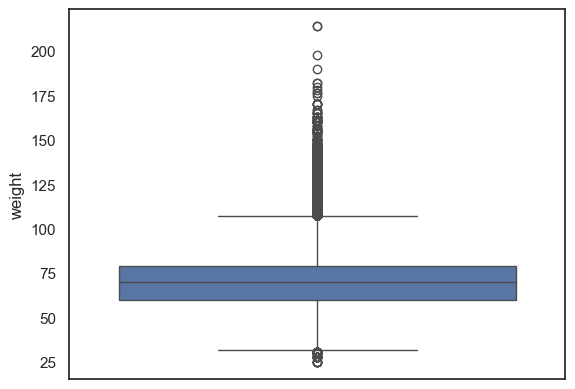

In [158]:
sns.boxplot(df['weight'])

Pero dado que tenemos una variable categórica (en este caso binaria, pues tiene solo dos valores posibles), podemos utilizar dos boxplots paralelos para analizar la distribución de esta misma variable numérica después de ser agrupada utilizando la variable categórica:

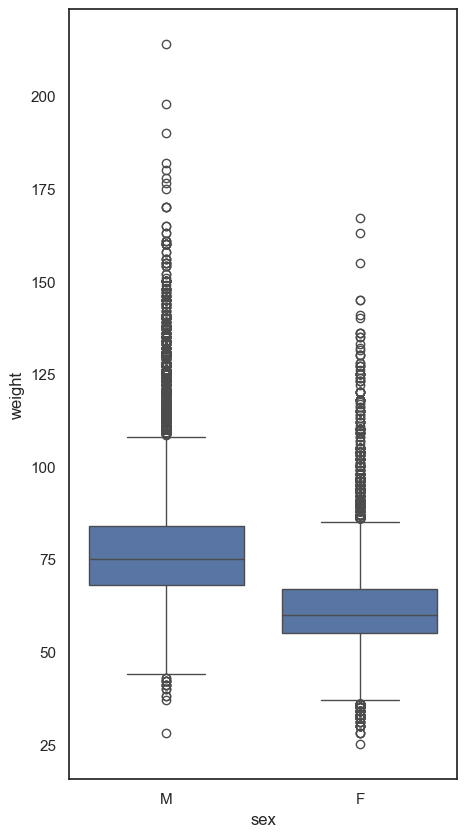

In [159]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=merged, x='sex', y='weight');

También podemos explorar las distribuciones usando un violinplot. Un violinplot es muy parecido a un boxplot, pero la diferencia es que en vez de graficar frecuencias grafica estimados de densidad. ¿Recuerdas las gráficas de densidad que utilizamos para hacer los histogramas más 'suaves' y poder comparar dos histogramas al mismo tiempo? Bueno, un violinplot es básicamente un boxplot mezclado con una gráfica de densidad.

En un violinplot es mucho más fácil ver ciertos detalles en la distribución de los datos que no es posible ver en los boxplots (ya que un boxplot no tiene mucha flexibilidad en cuanto a figuras se refiere). En cambio, en un violinplot es mucho más difícil ver los valores atípicos y dónde se encuentran ubicados.

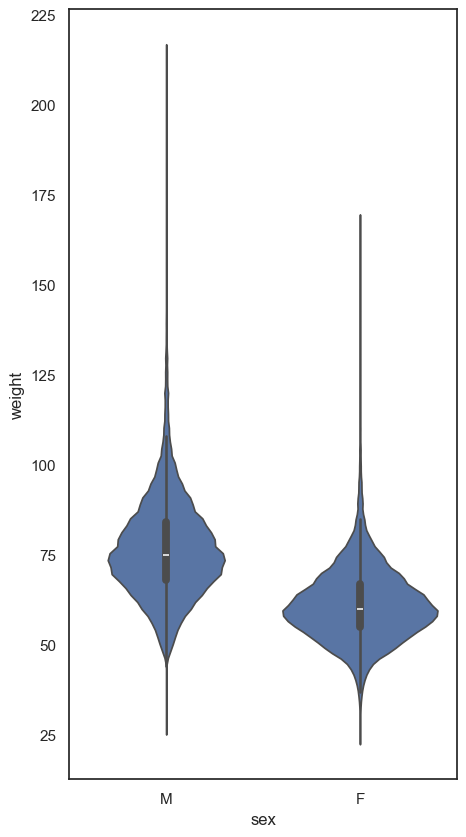

In [160]:
plt.figure(figsize=(5, 10))
sns.violinplot(data=merged, x='sex', y='weight');

La 'pildorita' negra en medio del violinplot representa el Rango Intercuartílico y el punto blanco la mediana. Así puedes comparar más fácilmente lo que estamos viendo en esta gráfica con la gráfica anterior.